In [311]:
import math
from numpy import sqrt
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [312]:
X_test = np.load('X_test.npy')

In [313]:
y_test = pd.read_csv('y_test.csv')
y_test.head()

,Amplitudes,Frequencies,Daping coeffitients,Speeds
0,0.880872,15.942382,6.535301,-1.016214
1,0.444304,57.443045,9.377057,1.848360
2,1.309435,44.808915,6.877844,-5.630539
3,3.145914,84.409868,9.877931,7.270011
4,2.846638,83.682527,2.003107,-5.025999


Amplitudes              3.561127
Frequencies            95.559154
Daping coeffitients     6.940742
Speeds                 -5.651902
Name: 5, dtype: float64


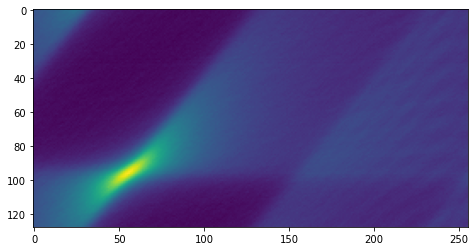

In [314]:
print(y_test.iloc[5])
plt.figure(figsize=(10,4))
plt.imshow(X_test[5].T)
plt.show()

Amplitudes               2.589355
Frequencies            107.386998
Daping coeffitients      9.256726
Speeds                   5.271206
Name: 189, dtype: float64


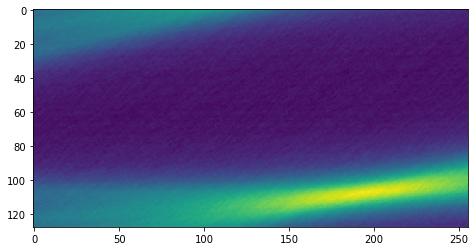

In [315]:
print(y_test.iloc[189])
plt.figure(figsize=(10,4))
plt.imshow(X_test[189].T)
plt.show()

In [316]:
y_test.iloc[:10]

,Amplitudes,Frequencies,Daping coeffitients,Speeds
0,0.880872,15.942382,6.535301,-1.016214
1,0.444304,57.443045,9.377057,1.848360
2,1.309435,44.808915,6.877844,-5.630539
3,3.145914,84.409868,9.877931,7.270011
4,2.846638,83.682527,2.003107,-5.025999
5,3.561127,95.559154,6.940742,-5.651902
6,2.409922,117.115739,8.289137,4.046034
7,4.202801,53.693314,3.670882,-3.883816
8,3.139044,12.394763,6.784808,-5.998959
9,2.123878,71.640627,6.638801,-6.199460


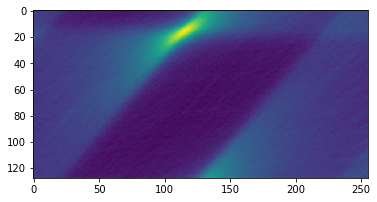

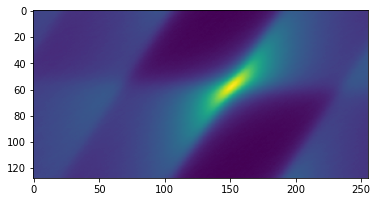

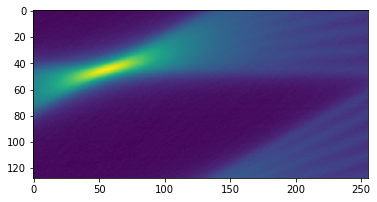

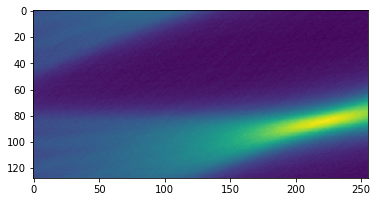

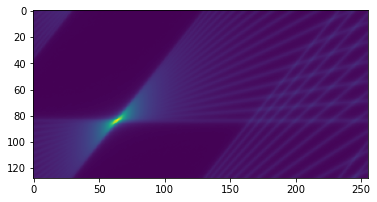

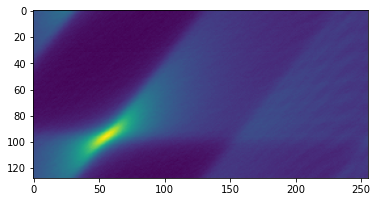

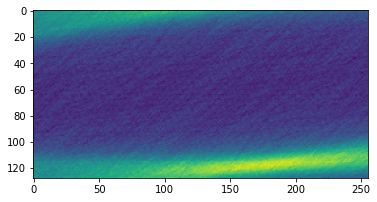

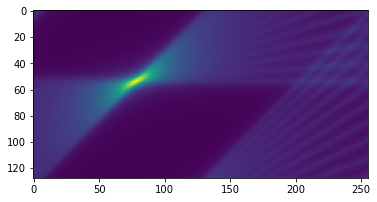

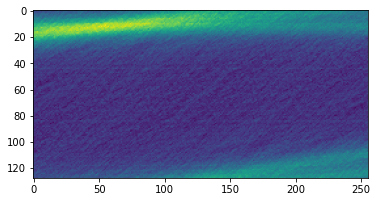

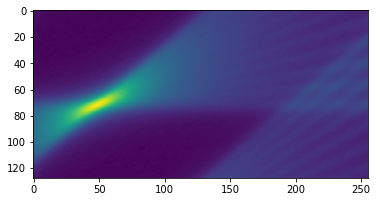

In [317]:
for element in X_test[:10]:
    plt.imshow(element.T)
    plt.show()

In [318]:
X_test = (X_test - 18.439472) / 25.953499

In [319]:
modelNMR = tf.keras.models.load_model('NMRmodel.model')

In [320]:
y_pred = modelNMR.predict(X_test)

In [321]:
amp, freq, damp, speed = y_pred

In [322]:
amp = (amp * 1.3739507) + 2.5182393 
freq = (freq * 31.369093) + 64.331924
damp = (damp * 2.8327253) + 5.200225
speed = (speed * 4.654785) + 0.07005237

In [323]:
y_pred_ampl = pd.DataFrame(amp, columns=['ampl'])
y_pred_freq = pd.DataFrame(freq, columns=['freq'])
y_pred_damp = pd.DataFrame(damp, columns=['damp'])
y_pred_speed = pd.DataFrame(speed, columns=['speed'])

In [324]:
df_y_pred = y_pred_ampl.join(y_pred_freq).join(y_pred_damp).join(y_pred_speed)

In [325]:
df_y_pred.shape

(1000, 4)

In [346]:
# df_y_pred.to_csv('df_y_pred.csv', index=False)

In [195]:
# new_df_y_pred = pd.read_csv('df_y_pred.csv')

In [334]:
mseAmp = mean_squared_error(y_test.iloc[:,0], df_y_pred.iloc[:,0])
print("MSEampl: %.4f" % (mseAmp))
mseFreq = mean_squared_error(y_test.iloc[:,1], df_y_pred.iloc[:,1])
print("MSEfreq: %.4f" % (mseFreq))
mseDamp = mean_squared_error(y_test.iloc[:,2], df_y_pred.iloc[:,2])
print("MSEdamp: %.4f" % (mseDamp))
mseSpeed = mean_squared_error(y_test.iloc[:,3], df_y_pred.iloc[:,3])
print("MSEspeed: %.4f" % (mseSpeed))

MSEampl: 0.0658
MSEfreq: 18.7404
MSEdamp: 0.8728
MSEspeed: 0.4086


In [335]:
rmseAmp = np.sqrt(mean_squared_error(y_test.iloc[:,0], df_y_pred.iloc[:,0]))
print("RMSEampl: %.4f" % (rmseAmp))
rmseFreq = np.sqrt(mean_squared_error(y_test.iloc[:,1], df_y_pred.iloc[:,1]))
print("RMSEfreq: %.4f" % (rmseFreq))
rmseDamp = np.sqrt(mean_squared_error(y_test.iloc[:,2], df_y_pred.iloc[:,2]))
print("RMSEdamp: %.4f" % (rmseDamp))
rmseSpeed = np.sqrt(mean_squared_error(y_test.iloc[:,3], df_y_pred.iloc[:,3]))
print("RMSEspeed: %.4f" % (rmseSpeed))

RMSEampl: 0.2564
RMSEfreq: 4.3290
RMSEdamp: 0.9342
RMSEspeed: 0.6392


In [336]:
maeAmp = mean_absolute_error(y_test.iloc[:,1], df_y_pred.iloc[:,0])
print("MAEampl: %.4f" % (rmseAmp))
maeFreq = mean_absolute_error(y_test.iloc[:,1], df_y_pred.iloc[:,1])
print("MAEfreq: %.4f" % (maeFreq))
maeDamp = mean_absolute_error(y_test.iloc[:,1], df_y_pred.iloc[:,2])
print("MAEdamp: %.4f" % (maeDamp))
maeSpeed = mean_absolute_error(y_test.iloc[:,1], df_y_pred.iloc[:,3])
print("MAEspeed: %.4f" % (maeSpeed))

MAEampl: 0.2564
MAEfreq: 2.4708
MAEdamp: 58.9434
MAEspeed: 62.9965


In [329]:
textamp = '\n'.join((r'mse=%.4f' % (mseAmp), r'rmse=%.4f' % (rmseAmp), r'mae=%.4f' % (maeAmp)))
textfreq = '\n'.join((r'mse=%.4f' % (mseFreq), r'rmse=%.4f' % (rmseFreq), r'mae=%.4f' % (maeFreq)))
textdamp = '\n'.join((r'mse=%.4f' % (mseDamp), r'rmse=%.4f' % (rmseDamp), r'mae=%.4f' % (maeDamp)))
textspeed = '\n'.join((r'mse=%.4f' % (mseSpeed), r'rmse=%.4f' % (rmseSpeed), r'mae=%.4f' % (maeSpeed)))

In [343]:
y_test100 = y_test[:200]
y_test100.shape

(200, 4)

In [344]:
df_y_pred100 = df_y_pred[:200]
df_y_pred100.shape

(200, 4)

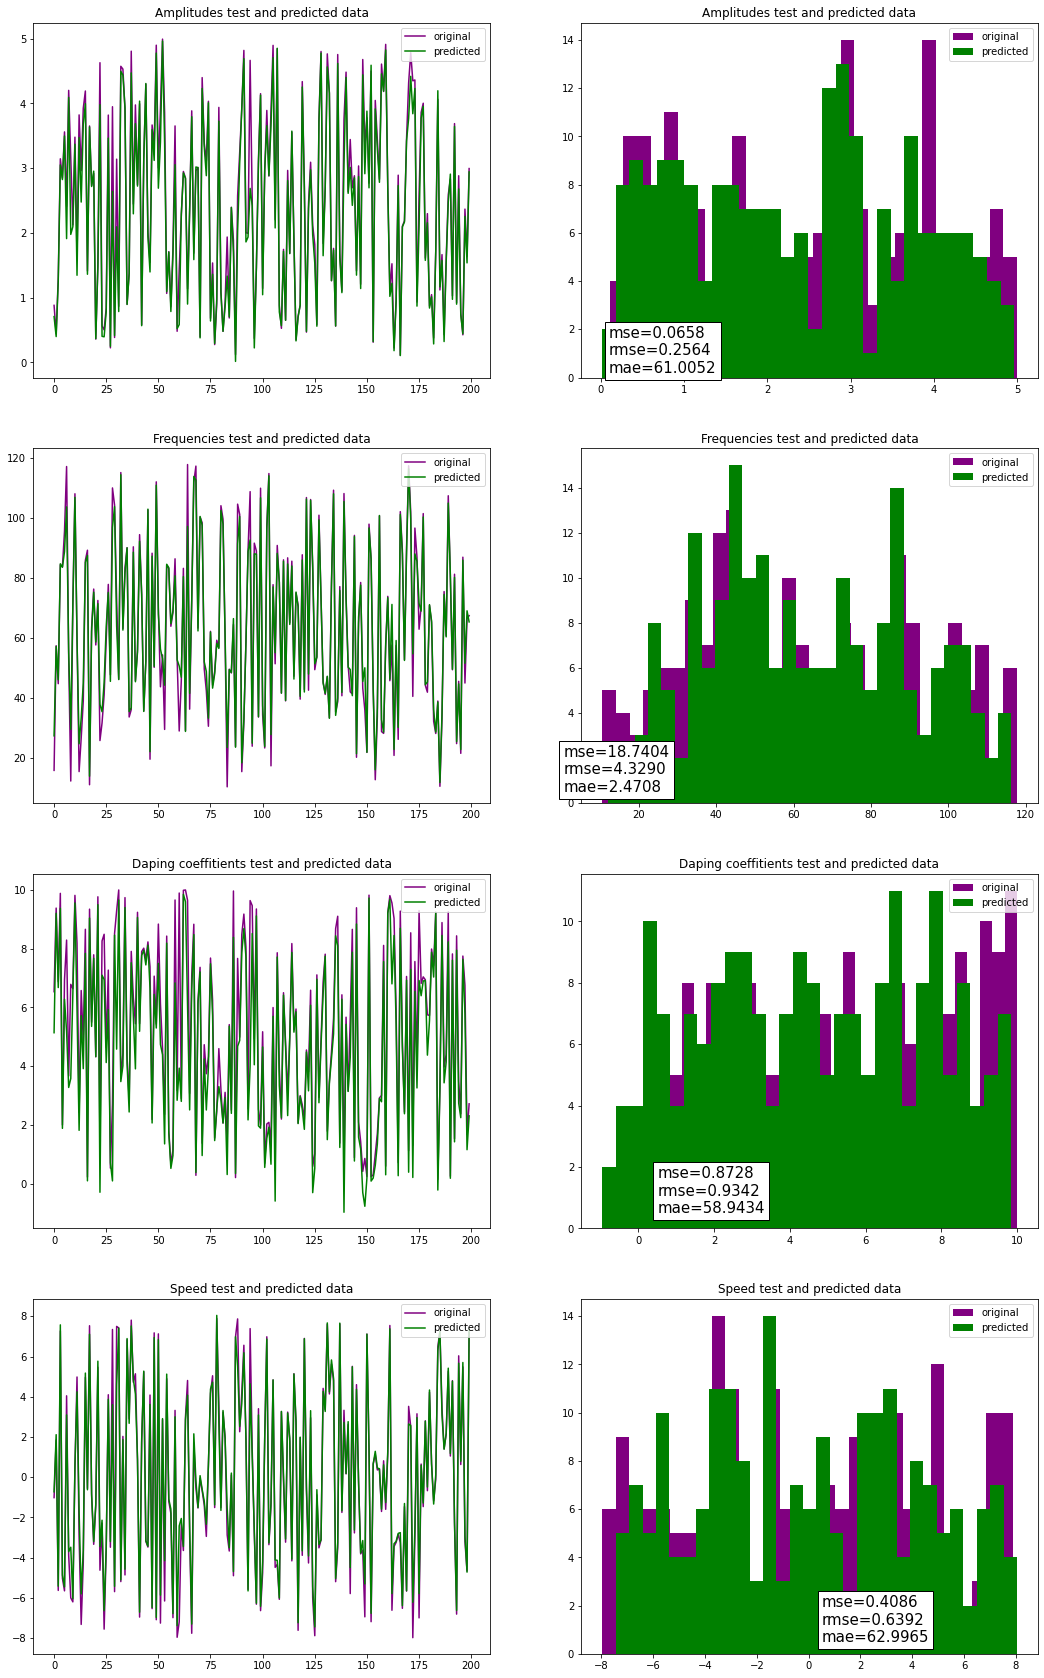

In [350]:
fig, axes = plt.subplots(4, 2, figsize=(18,30))
ax = axes[0][0]
ax.plot(range(len(y_test100)), y_test100.iloc[:,0], label="original", color='purple')
ax.plot(range(len(y_test100)), df_y_pred100.iloc[:,0], label="predicted", color='green')
ax.set_title("Amplitudes test and predicted data")
ax.legend(loc='upper right')
ax = axes[0][1]
ax.hist(y_test100.iloc[:,0], bins=30, label='original', color='purple')
ax.hist(df_y_pred100.iloc[:,0], bins=30, label='predicted', color='green')
ax.set_title("Amplitudes test and predicted data")
ax.legend(loc='upper right')
ax.text(0.1, 0.2, textamp, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))

ax = axes[1][0]
ax.plot(range(len(y_test100)), y_test100.iloc[:,1], label="original", color='purple')
ax.plot(range(len(y_test100)), df_y_pred100.iloc[:,1], label="predicted", color='green')
ax.set_title("Frequencies test and predicted data")
ax.legend(loc='upper right')
ax = axes[1][1]
ax.hist(y_test100.iloc[:,1], bins=30, label='original', color='purple')
ax.hist(df_y_pred100.iloc[:,1], bins=30, label='predicted', color='green')
ax.set_title("Frequencies test and predicted data")
ax.legend(loc='upper right')
ax.text(0.5, 0.5, textfreq, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))

ax = axes[2][0]
ax.plot(range(len(y_test100)), y_test100.iloc[:,2], label="original", color='purple')
ax.plot(range(len(y_test100)), df_y_pred100.iloc[:,2], label="predicted", color='green')
ax.set_title("Daping coeffitients test and predicted data")
ax.legend(loc='upper right')
ax = axes[2][1]
ax.hist(y_test100.iloc[:,2], bins=30, label='original', color='purple')
ax.hist(df_y_pred100.iloc[:,2], bins=30, label='predicted', color='green')
ax.set_title("Daping coeffitients test and predicted data")
ax.legend(loc='upper right')
ax.text(0.5, 0.5, textdamp, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))

ax = axes[3][0]
ax.plot(range(len(y_test100)), y_test100.iloc[:,3], label="original", color='purple')
ax.plot(range(len(y_test100)), df_y_pred100.iloc[:,3], label="predicted", color='green')
ax.set_title("Speed test and predicted data")
ax.legend(loc='upper right')
ax = axes[3][1]
ax.hist(y_test100.iloc[:,3], bins=30, label='original', color='purple')
ax.hist(df_y_pred100.iloc[:,3], bins=30, label='predicted', color='green')
ax.set_title("Speed test and predicted data")
ax.legend(loc='upper right')
ax.text(0.5, 0.5, textspeed, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))

plt.savefig('plot1.png', dpi=200)
plt.show()

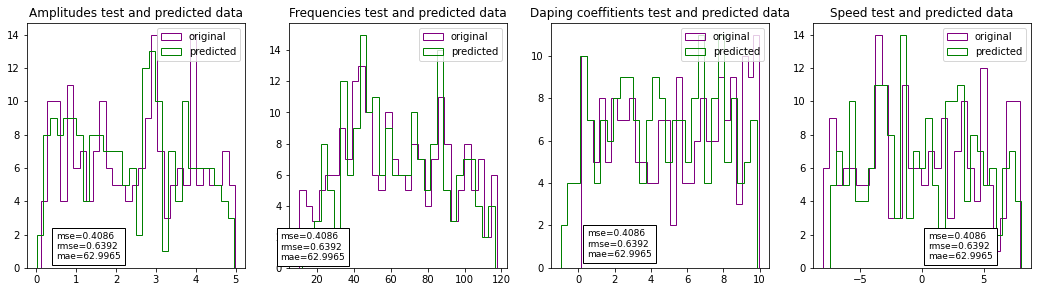

In [357]:
fig, axes = plt.subplots(1,4, figsize=(18, 4.5))
ax = axes[0]
ax.hist(y_test100.iloc[:,0], bins=30, histtype='step', label='original', color='purple')
ax.hist(df_y_pred100.iloc[:,0], bins=30, histtype='step', label='predicted', color='green')
ax.set_title("Amplitudes test and predicted data")
ax.legend(loc='upper right')
ax.text(0.5, 0.5, textspeed, fontsize=9, bbox=dict(facecolor='white', edgecolor='black'))

ax = axes[1]
ax.hist(y_test100.iloc[:,1], bins=30, histtype='step', label='original', color='purple')
ax.hist(df_y_pred100.iloc[:,1], bins=30, histtype='step', label='predicted', color='green')
ax.set_title("Frequencies test and predicted data")
ax.legend(loc='upper right')
ax.text(0.5, 0.5, textspeed, fontsize=9, bbox=dict(facecolor='white', edgecolor='black'))

ax = axes[2]
ax.hist(y_test100.iloc[:,2], bins=30, histtype='step', label='original', color='purple')
ax.hist(df_y_pred100.iloc[:,2], bins=30, histtype='step', label='predicted', color='green')
ax.set_title("Daping coeffitients test and predicted data")
ax.legend(loc='upper right')
ax.text(0.5, 0.5, textspeed, fontsize=9, bbox=dict(facecolor='white', edgecolor='black'))

ax = axes[3]
ax.hist(y_test100.iloc[:,3], bins=30, histtype='step', label='original', color='purple')
ax.hist(df_y_pred100.iloc[:,3], bins=30, histtype='step', label='predicted', color='green')
ax.set_title("Speed test and predicted data")
ax.legend(loc='upper right')
ax.text(0.5, 0.5, textspeed, fontsize=9, bbox=dict(facecolor='white', edgecolor='black'))

plt.savefig('plot2.png', dpi=200)
plt.show()